This is a test program to plot graphics

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os

In [6]:
def exp_gen(out_max,in_max,x):
    if in_max > 1:
        return( int ( x + ((out_max-in_max+1)**(1/(in_max-1)))**x ) )
    else :
        return( int (out_max) )

Création des données

In [52]:
dim = (10,1)
mat_x = np.zeros(dim,dtype=float)
mat_y = np.zeros(dim,dtype=int)
out_max_m = 500
out_max_n = 100

for m in range(dim[1]):
    vertex = exp_gen(out_max_m,dim[1],m)
    f0 = open("../data/vertex_limit.cin", "w")
    f0.write(str(vertex))
    f0.close()

    for n in range(dim[0]):
        x = exp_gen(out_max_n,dim[0],n)
        f1 = open("../data/twist.cin", "w")
        f1.write(str(x))
        # l_x.append(x) # pour avoir x = nombre de twists
        f1.close()

        os.system("cd /Users/cyril/Desktop/dossiers_cyril/stage/cyril-flips/code; ./demo")
        #print(vertex,x)

        f2 = open("../resultats/output.cin")
        ligne = f2.read()
        [diametre,flips] = ligne.split(" ")
        mat_x[n,m]= (float(diametre))
        mat_y[n,m]= (int  (flips))
        f2.close()
    print("- %i%% " % ((m+1)*100/(dim[1])))

mat_x_archive = np.copy(mat_x)
mat_y_archive = np.copy(mat_y)


- 100% 


In [392]:
def derive(mat1,mat2,lissage=1):
    return ( (mat1[lissage:,:] - mat1[:-lissage,::])/(mat2[lissage:,:] - mat2[:-lissage,::])
           , (mat2[lissage:,:] + mat2[:-lissage,::])/2        )

def derive_log(mat1,mat2,lissage=1):
    m1,m2 = derive(np.log(mat1),np.log(mat2),lissage=lissage)
    return m1,np.exp(m2)

In [819]:
def matrice_max(mat1,mat2):
    assert np.shape(mat1) == np.shape(mat2)
    mat3 = np.zeros_like(mat1)
    for index in np.ndindex(np.shape(mat1)):
        mat3[index] = max(mat1[index],mat2[index])
    return mat3

def matrice_smooth_max(mat1,mat2,alpha=2):
    return (mat1**alpha + mat2**alpha)**(1/alpha)

In [233]:
mat_test  = np.array([[1,4,2],[2,5,3],[3,6,4]])
mat_test2 = np.array([[1,1,1],[2,2,2],[3,3,3]])
print(derive(mat_test,mat_test2))
mat_y_derive,mat_x_derive = derive(mat_y,mat_x)
print(mat_y[:,1])
print(mat_y_derive[:,1])

(array([[1., 1., 1.]]), array([[2., 2., 2.]]))
[    6    16    21    20    19    20    25    26    28    31    32    36
    42    49    56    66    72    88   102   120   144   176   215   263
   326   404   502   629   783   981  1233  1551  1955  2464  3106  3924
  4954  6262  7914 10014]
[ 7.9489571   1.36963787 -0.67843526  0.          1.50968843  1.50639843
  0.75227563  1.0021245   0.6677239   0.71508252  1.2510321   1.30074142
  1.07736231  1.13365832  0.8890667   0.95665484  1.03457908  0.91433274
  0.95458017  1.00003572  1.01431469  0.9886476   1.00909091  1.01439579
  1.00000568  1.00896861  0.9964539   0.9915493   1.00000222  1.00000175
  1.00277778  1.00219539  0.99826539  1.          0.99945917  0.9991453
  0.99932478  1.0002666 ]


In [225]:
print([exp_gen(out_max_m,dim[1],m) for m in range(dim[1])])

[1, 3, 6, 13, 26, 52, 110, 232, 497, 1069, 2310, 5000]


Plots

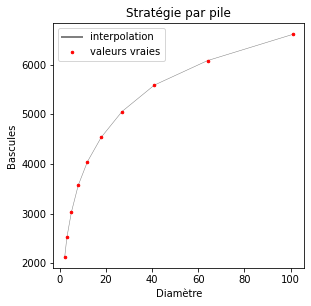

<Figure size 432x288 with 0 Axes>

In [34]:
fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(4.5, 4.5)
fig = plt.figure()
#mat_nb_pts = np.array([[exp_gen(5000,12,m) for m in range(12)]for x in range(len(mat_y))])
#mat_estim = matrice_smooth_max( 2.3 * mat_nb_pts * (np.log(mat_x) + 1) , mat_x ,alpha=1.5)
#ax1.plot(mat_x,mat_estim,c="green",linewidth = 0.1)
ax1.plot(mat_x,mat_y,c="grey",linewidth = 0.5)
#ax1.plot(mat_x,mat_x,c="green",linewidth = 0.01)
#ax1.plot(l_x,[1.05*x + 800 for x in l_x],c="green")
ax1.plot(mat_x,mat_y,".",c="red",markersize = 5.1)

#plt.plot([],[],c="green",linewidth = 0.1,label="estimation")
ax1.plot([],[],c="grey",linewidth = 2,label="interpolation")
ax1.plot([],[],".",c="red",markersize = 5,label="valeurs vraies")

ax1.set_title("Stratégie par pile")
ax1.legend() #"approximation affine"
ax1.set_xlabel("Diamètre")
ax1.set_ylabel("Bascules")
#ax1.suptitle("choix par angle ")
#ax1.yscale('log',base=2)
#ax1.xscale('log',base=2)
#ax1.ylim([1,2**14])
#ax1.xlim([1,1000])
fig.savefig('complexite_pile.png', dpi=500)

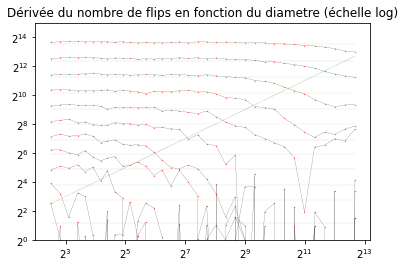

In [818]:
fig = plt.figure()
mat_y_derive_l10,mat_x_derive_l10 = derive(mat_y-mat_x,mat_x,lissage=5)
mat_y_derive_l10 = mat_y_derive_l10 * mat_x_derive_l10
mat_y_derive,mat_x_derive = derive(mat_y,mat_x,lissage=2)
#plt.plot(mat_x_derive,mat_y_derive,c="black",linewidth = 0.05)
#plt.plot(mat_x_derive,mat_y_derive,".",c="orange",markersize = .3)

plt.plot(mat_x_derive_l10,mat_y_derive_l10,c="black",linewidth = 0.15)
plt.plot(mat_x_derive_l10,mat_y_derive_l10,".",c="red",markersize = .5)
plt.plot(mat_x_derive_l10,mat_x_derive_l10,c="green",linewidth = .01)
plt.plot(mat_x_derive_l10,np.array([[2.3*exp_gen(5000,12,m) for m in range(12)]for x in range(len(mat_x_derive_l10))]) ,linewidth = .1  )

plt.title("Dérivée du nombre de flips en fonction du diametre (échelle log)")
#plt.suptitle("échelle log ")
plt.yscale('log',base=2)
plt.xscale('log',base=2)
plt.ylim([2**0,2**15])
fig.savefig('complexite_derivee_comparaison_lissage_moins_x.png', dpi=500)


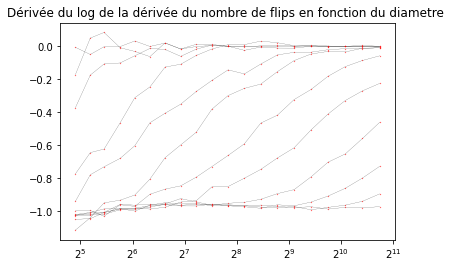

In [447]:
fig = plt.figure()
mat_y_derive,mat_x_derive         = derive(mat_y,mat_x,lissage=10)
mat_y_derive_snd,mat_x_derive_snd = derive_log(mat_y_derive,mat_x_derive,lissage=10)
plt.plot(mat_x_derive_snd,mat_y_derive_snd,c="black",linewidth = 0.15)
plt.plot(mat_x_derive_snd,mat_y_derive_snd,".",c="red",markersize = .5)

plt.title("Dérivée du log de la dérivée du nombre de flips en fonction du diametre ")
#plt.suptitle("échelle log ")
#plt.yscale('log',base=2)
plt.xscale('log',base=2)
#plt.axis([0,200,0,200])
fig.savefig('complexite_double_derivee_comparaison_lissage.png', dpi=500)

In [53]:
mat_x_angle_inverse = np.copy(mat_x)
mat_y_angle_inverse = np.copy(mat_y)

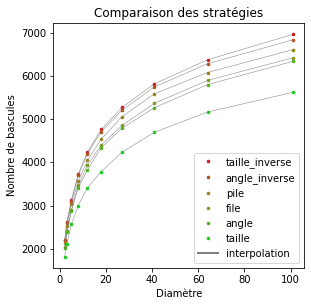

In [79]:
### Comparaison

fig, ax1 = plt.subplots(1, 1)
fig.set_size_inches(4.5, 4.5)

#taille_inverse
ax1.plot(mat_x_taille_inverse[::,0],mat_y_taille_inverse[::,0],c="grey",linewidth = 0.5)
ax1.plot(mat_x_taille_inverse[::,0],mat_y_taille_inverse[::,0],".",c=(0.8,.1,.1),markersize = 5.1,label = "taille_inverse")


#angle_inverse
ax1.plot(mat_x_angle_inverse[::,0],mat_y_angle_inverse[::,0],c="grey",linewidth = 0.5)
ax1.plot(mat_x_angle_inverse[::,0],mat_y_angle_inverse[::,0],".",c=(0.7,.3,.1),markersize = 5.1,label = "angle_inverse")


#pile
ax1.plot(mat_x_pile[::,0],mat_y_pile[::,0],c="grey",linewidth = 0.5)
ax1.plot(mat_x_pile[::,0],mat_y_pile[::,0],".",c=(0.6,.5,.1),markersize = 5.1,label = "pile")


#file
ax1.plot(mat_x_file[::,0],mat_y_file[::,0],c="grey",linewidth = 0.5)
ax1.plot(mat_x_file[::,0],mat_y_file[::,0],".",c=(0.5,.6,.1),markersize = 5.1,label = "file")


#angle
ax1.plot(mat_x_angle[::,0],mat_y_angle[::,0],c="grey",linewidth = 0.5)
ax1.plot(mat_x_angle[::,0],mat_y_angle[::,0],".",c=(0.3,.7,.1),markersize = 5.1,label = "angle")


#taille
ax1.plot(mat_x_taille[::,0],mat_y_taille[::,0],c="grey",linewidth = 0.5)
ax1.plot(mat_x_taille[::,0],mat_y_taille[::,0],".",c=(0.1,.8,.1),markersize = 5.1,label = "taille")

ax1.plot([],[],c="grey",linewidth = 2,label="interpolation")

ax1.set_title("Comparaison des stratégies")
ax1.legend()
ax1.set_xlabel("Diamètre")
ax1.set_ylabel("Nombre de bascules")
#ax1.suptitle("choix par angle ")
#ax1.yscale('log',base=2)
#ax1.xscale('log',base=2)
#ax1.ylim([1,2**14])
#ax1.xlim([1,1000])
fig.savefig('complexite_strategies.png', dpi=700)

Estimation

In [558]:
def estimation(m,x,a=11750,b=0.2,c=15750): #m=5000
    m = m
    result = (a*np.log(x) + b*x + c) 
    return result

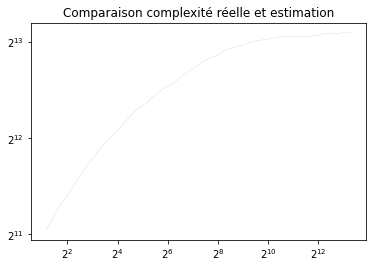

In [640]:
fig = plt.figure()
v_x,v_y = (mat_x[::,-4],mat_y[::,-4]) 
v_estim = np.array([estimation(m,x,1375,1,1175) for x in v_x])
T = len(v_x)
m = 497
mat_nb_pts = np.array([[exp_gen(5000,12,m) for m in range(12)]for x in range(len(mat_y))])
mat_a = 2.7 * mat_nb_pts


#plt.plot(v_x,np.transpose([  np.array([estimation(m,x,a=a,b=1,c=975) for x in v_x]) for a in np.linspace(800,1200,10) ]  ),linewidth = 0.1)
#plt.plot(v_x,np.transpose([ v_y - np.array([estimation(m,x,b=b) for x in v_x]) for b in np.linspace(0.1,0.3,10) ]  ))

plt.plot(v_x,np.transpose( [ v_y[i] - v_x[i] for i in range(T)]  ),linewidth = 0.1)

#plt.plot(v_x,v_y,c="grey",linewidth = 0.2)      #extrapolations
#plt.plot(v_x,v_y,".",c="red",markersize = 1)       #valeurs vraies
#plt.plot(v_x,v_estim,c="green",linewidth = 0.1)      #estimation 
#plt.plot(v_x,v_y/v_estim)     # ratio
#plt.plot(v_x,v_y-v_estim)     # difference

m_alpha = np.zeros((T,T))
for i in range(T):
    for j in range(T):
        if i==j :
            m_alpha[i,j] = -np.inf
        else : 
            m_alpha[i,j] = (v_y[i] - v_y[j] - v_x[i] + v_x[j]) / ( np.log(v_x[i]) - np.log(v_x[j]) )

plt.title("Comparaison complexité réelle et estimation")
#plt.legend(["valeurs réelles reliées","valeurs réelles"]) #"approximation affine"
#plt.suptitle("choix par angle ")
plt.yscale('log',base=2)
plt.xscale('log',base=2)
fig.savefig('complexite_comparaison_simulation.png', dpi=500)

In [402]:
dim = (40,12)
out_max_m = 5000
out_max_n = 10000
for m in range(dim[1]):
    print("m : ",exp_gen(out_max_m,dim[1],m))
for n in range(dim[0]):
    print("n : ",exp_gen(out_max_n,dim[0],n))

m :  1
m :  3
m :  6
m :  13
m :  26
m :  52
m :  110
m :  232
m :  497
m :  1069
m :  2310
m :  5000
n :  1
n :  2
n :  3
n :  5
n :  6
n :  8
n :  10
n :  12
n :  14
n :  17
n :  20
n :  24
n :  28
n :  34
n :  41
n :  49
n :  59
n :  72
n :  88
n :  107
n :  132
n :  163
n :  202
n :  251
n :  312
n :  390
n :  488
n :  613
n :  770
n :  968
n :  1220
n :  1538
n :  1940
n :  2449
n :  3093
n :  3909
n :  4942
n :  6249
n :  7904
n :  10000


In [222]:
mat_x

array([[2.23607e+00, 2.23607e+00, 2.23607e+00, 2.23607e+00, 2.23607e+00,
        2.23607e+00, 2.23607e+00, 2.23607e+00, 2.23607e+00, 2.23607e+00,
        2.23607e+00, 2.23607e+00],
       [3.16228e+00, 3.16228e+00, 3.16228e+00, 3.16228e+00, 3.16228e+00,
        3.16228e+00, 3.16228e+00, 3.16228e+00, 3.16228e+00, 3.16228e+00,
        3.16228e+00, 3.16228e+00],
       [4.12311e+00, 4.12311e+00, 4.12311e+00, 4.12311e+00, 4.12311e+00,
        4.12311e+00, 4.12311e+00, 4.12311e+00, 4.12311e+00, 4.12311e+00,
        4.12311e+00, 4.12311e+00],
       [6.08276e+00, 6.08276e+00, 6.08276e+00, 6.08276e+00, 6.08276e+00,
        6.08276e+00, 6.08276e+00, 6.08276e+00, 6.08276e+00, 6.08276e+00,
        6.08276e+00, 6.08276e+00],
       [7.07107e+00, 7.07107e+00, 7.07107e+00, 7.07107e+00, 7.07107e+00,
        7.07107e+00, 7.07107e+00, 7.07107e+00, 7.07107e+00, 7.07107e+00,
        7.07107e+00, 7.07107e+00],
       [9.05539e+00, 9.05539e+00, 9.05539e+00, 9.05539e+00, 9.05539e+00,
        9.05539e+00, 9

In [221]:
mat_y

array([[     3,      6,     18,     46,     82,    176,    400,    921,
          2115,   4906,  11293,  25645],
       [     4,     16,     26,     53,     95,    210,    476,   1077,
          2495,   5636,  12759,  28984],
       [     7,     21,     34,     59,    118,    237,    518,   1226,
          2747,   6274,  14017,  31744],
       [     7,     20,     32,     74,    142,    283,    645,   1440,
          3208,   7155,  16021,  36172],
       [    10,     19,     36,     81,    148,    303,    678,   1526,
          3401,   7537,  16860,  38023],
       [    10,     20,     43,     87,    180,    351,    754,   1670,
          3695,   8113,  18278,  41022],
       [    14,     25,     44,     99,    185,    393,    822,   1792,
          3956,   8689,  19498,  43548],
       [    14,     26,     46,    100,    194,    395,    863,   1925,
          4118,   9163,  20505,  45721],
       [    18,     28,     49,    114,    201,    416,    883,   1979,
          4285,   9495, 

In [201]:
nombre_de_lignes = 5000
f1 = open("../data/5000_random_points.cin", "w")
for i in range(nombre_de_lignes):
    #print("%.4f %.4f" % (np.random.rand(),np.random.rand()))
    f1.write("%.4f %.4f" % (np.random.rand(),np.random.rand()))
    if i<nombre_de_lignes-1:
        f1.write("\n")
f1.close()

